In [1]:
import sys
import py_entitymatching as em
import pandas as pd
import os

In [2]:
hhh_blocking=pd.read_csv('csv_files/hhh_blocking.csv')

In [3]:
hhh_blocking.head()

,_id,idWalmart,idAmazon,brand_brand_jac_qgm_3_qgm_3,modelno_modelno_jac_qgm_3_qgm_3,title_title_jac_qgm_3_qgm_3,brand_walmart,brand_amazon,modelno_walmart,modelno_amazon,gold
0,0,1,976,0.0625,0.0,0.162500,1,1,1,1,0
1,1,1,1113,1.0000,0.0,0.029851,1,1,1,1,0
2,2,1,2990,0.0000,0.0,0.194030,1,1,1,1,0
3,3,1,3330,0.0000,0.0,0.134752,1,1,1,1,0
4,4,1,4408,0.0625,0.0,0.250000,1,1,1,0,0


In [5]:
for index, row in hhh_blocking.iterrows():
    if row['brand_walmart']==0 or row['brand_amazon']==0:
        hhh_blocking['brand_brand_jac_qgm_3_qgm_3'][index]=0
    if row['modelno_walmart']==0 or row['modelno_amazon']==0:
        hhh_blocking['modelno_modelno_jac_qgm_3_qgm_3'][index]=0

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [ ]:
hhh_blocking.head()

In [ ]:
columns=['_id',
         'idWalmart',
         'idAmazon',
         'brand_brand_jac_qgm_3_qgm_3',
         'modelno_modelno_jac_qgm_3_qgm_3',
         'title_title_jac_qgm_3_qgm_3',
         'gold']
hhh_blocking=hhh_blocking[columns]

In [ ]:
hhh_blocking.head()

In [ ]:
hhh_blocking.to_csv('csv_files/hhh_blocking2.csv',index=False)

In [4]:
import pandas as pd
import numpy as np

hhh=pd.read_csv('csv_files/hhh_blocking2.csv')
original_hhh=hhh.copy(deep=True)

In [5]:
def split_train_test(df,test_len):
    df_index=df.index
    df_len=len(df_index)
    test_index=np.random.choice(df_index,test_len,replace=False)
    test_index=np.sort(test_index)
    train_index=[]
    df_ptr=test_ptr=0
    while df_ptr<df_len and test_ptr<test_len:
        if df_index[df_ptr]==test_index[test_ptr]:
            df_ptr+=1
            test_ptr+=1
        elif df_index[df_ptr]<test_index[test_ptr]:
            train_index.append(df_index[df_ptr])
            df_ptr+=1
        else:
            test_ptr+=1
    while df_ptr<df_len:
        train_index.append(df_index[df_ptr])
        df_ptr+=1
    train_index=np.array(train_index)
    return test_index, train_index
    
test_percentage=0.3
test_num=int(len(hhh)*test_percentage)
test_index,train_index = split_train_test(hhh,test_num)

In [6]:
hhh=hhh.loc[train_index]

In [7]:
m_data=hhh[hhh.gold==1]
u_data=hhh[hhh.gold==0]
u_data=u_data.sample(m_data.shape[0]*500)
m_len,u_len=len(m_data),len(u_data)
m_p=m_len/(m_len+u_len)
m_len,u_len,m_len+u_len,m_p,len(hhh)
m_array=np.array(m_data)[:,3:-1]
u_array=np.array(u_data)[:,3:-1]

In [8]:
print(test_index)
test_data=original_hhh.loc[test_index]
test_array=np.array(test_data)[:,3:-1]
test_label=np.array(test_data)[:,-1]
test_label=test_label.astype(int)

[      1       3       5 ... 1312065 1312066 1312070]


In [4]:
import pandas as pd
import numpy as np

test_data=pd.read_csv('csv_files/product_test_data.csv')
train_data=pd.read_csv('csv_files/product_train_data.csv')

In [5]:
test_data.head()

,_id,idWalmart,idAmazon,brand_brand_jac_qgm_3_qgm_3,modelno_modelno_jac_qgm_3_qgm_3,title_title_jac_qgm_3_qgm_3,gold
0,2,1,2990,0.0000,0.0,0.194030,0
1,3,1,3330,0.0000,0.0,0.134752,0
2,7,1,5398,0.0000,0.0,0.105263,0
3,8,1,7202,1.0000,0.0,0.081818,0
4,9,1,8778,0.0625,0.0,0.156250,0


In [6]:
m_data=pd.read_csv('csv_files/product_m_data.csv')
u_data=pd.read_csv('csv_files/product_u_data.csv')
m_len,u_len=len(m_data),len(u_data)
m_p=m_len/(m_len+u_len)
m_array=np.array(m_data)[:,3:-1]
u_array=np.array(u_data)[:,3:-1]

In [7]:
u_data[u_data['brand_brand_jac_qgm_3_qgm_3']==0]

,_id,idWalmart,idAmazon,brand_brand_jac_qgm_3_qgm_3,modelno_modelno_jac_qgm_3_qgm_3,title_title_jac_qgm_3_qgm_3,gold
1,1158832,2250,11477,0.0,0.0,0.118110,0
3,796015,1504,2499,0.0,0.0,0.090909,0
4,502500,962,9245,0.0,0.0,0.137931,0
5,639809,1221,10148,0.0,0.0,0.121212,0
6,1093960,2117,13595,0.0,0.0,0.132530,0
...,...,...,...,...,...,...,...
410490,368045,711,19795,0.0,0.0,0.126866,0
410491,1191867,2315,16092,0.0,0.0,0.072000,0
410492,366942,710,16163,0.0,0.0,0.072165,0
410494,36885,66,13059,0.0,0.0,0.218391,0


In [8]:
m_data.shape, u_data.shape

((821, 7), (410500, 7))

In [9]:
test_array=np.array(test_data)[:,3:-1]
test_label=np.array(test_data)[:,-1]
test_label=test_label.astype(int)

In [10]:
print(test_label)
sum(test_label),len(test_label)

[0 0 0 ... 0 0 0]


(333, 393621)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x=np.concatenate((m_array,u_array),axis=0)
y=np.array([1]*len(m_array)+[0]*len(u_array))
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x,y)
pred_label=clf.predict(test_array)
print('Accuracy', accuracy_score(test_label, pred_label))
print('Precision', precision_score(test_label, pred_label))
print('Recall', recall_score(test_label, pred_label))
print('f1_score', f1_score(test_label, pred_label))
confusion_matrix(test_label, pred_label)

Accuracy 0.999616382256028
Precision 0.8956521739130435
Recall 0.6186186186186187
f1_score 0.7317939609236235


array([[393264,     24],
       [   127,    206]])

In [16]:
from scipy.stats import multivariate_normal
pdf=multivariate_normal.pdf(u_array, mean=u_mean, cov=u_cov) 
sort_pdf_id=np.argsort(pdf)
sort_pdf=pdf[sort_pdf_id]
sort_pdf.resize(pdf.shape[0],1)
# sort_u_array=np.concatenate((u_array[sort_pdf_id],sort_pdf,(np.array(u_data)[sort_pdf_id])[:,0:3]),axis=1)
sort_u_array=np.concatenate((u_array[sort_pdf_id],sort_pdf),axis=1)


pdf=multivariate_normal.pdf(m_array, mean=m_mean, cov=m_cov)
sort_pdf_id=np.argsort(pdf)
sort_pdf=pdf[sort_pdf_id]
sort_pdf.resize(pdf.shape[0],1)
# sort_m_array=np.concatenate((m_array[sort_pdf_id],sort_pdf,(np.array(m_data)[sort_pdf_id])[:,0:3]),axis=1)
sort_m_array=np.concatenate((m_array[sort_pdf_id],sort_pdf),axis=1)


In [17]:
# def calculate_mean_cov(array):
#     m,n=array.shape  # m: number of tuples     n: number of dimensions
#     mean=np.sum(array,axis=0)/m
#     cov=np.zeros((n,n))
#     for x in array:
#         tmp=x-mean
#         cov=cov+tmp.reshape(n,1)*tmp.reshape(1,n)
#     cov=cov/m
#     return mean, cov

In [18]:
# m_array=np.array(m_data)[:,3:-1]
# u_array=np.array(u_data)[:,3:-1]
# m_mean,m_cov=calculate_mean_cov(m_array)
# u_mean,u_cov=calculate_mean_cov(u_array)

In [19]:
print(m_mean)
print(m_cov)
print(u_mean)
print(u_cov)
print(m_array.shape)
print(u_array.shape)

[0.86410266 0.5874155  0.50900261]
[[ 0.09389432  0.02237    -0.0046469 ]
 [ 0.02237     0.21747613 -0.01116577]
 [-0.0046469  -0.01116577  0.04473805]]
[0.21005036 0.01057608 0.09847641]
[[0.15437351 0.00421763 0.00363614]
 [0.00421763 0.00162914 0.0005711 ]
 [0.00363614 0.0005711  0.00371096]]
(821, 3)
(410500, 3)


In [20]:
def sample_from_distribution(m_mean,m_cov,u_mean,u_cov,m_sample_num,u_sample_num):
    m_sample_array=np.random.multivariate_normal(m_mean,m_cov,m_sample_num)
    u_sample_array=np.random.multivariate_normal(u_mean,u_cov,u_sample_num)
    return m_sample_array, u_sample_array

m_mean=m_mean.astype('float64')
m_cov=m_cov.astype('float64')
u_mean=u_mean.astype('float64')
u_cov=u_cov.astype('float64')
m_sample_num=m_len
u_sample_num=u_len
m_sample_array, u_sample_array=sample_from_distribution(m_mean,m_cov,u_mean,u_cov,m_sample_num,u_sample_num)

In [21]:
m_sample_mean,m_sample_cov=calculate_mean_cov(m_sample_array)
u_sample_mean,u_sample_cov=calculate_mean_cov(u_sample_array)

In [22]:
print(m_sample_mean)
print(m_sample_cov)
print(u_sample_mean)
print(u_sample_cov)
print(m_sample_array.shape)
print(u_sample_array.shape)

[0.85608744 0.59068568 0.50377517]
[[ 0.09289708  0.01980098 -0.00262539]
 [ 0.01980098  0.21022926 -0.0113467 ]
 [-0.00262539 -0.0113467   0.04537013]]
[0.20929517 0.01067549 0.09859805]
[[0.15462476 0.00420963 0.00360098]
 [0.00420963 0.00163159 0.00056918]
 [0.00360098 0.00056918 0.0037103 ]]
(821, 3)
(410500, 3)


In [17]:
x_sample=np.concatenate((m_sample_array,u_sample_array),axis=0)
y_sample=np.array([1]*len(m_sample_array)+[0]*len(u_sample_array))
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x_sample, y_sample)
pred_label=clf.predict(test_array)
print('Accuracy', accuracy_score(test_label, pred_label))
print('Precision', precision_score(test_label, pred_label))
print('Recall', recall_score(test_label, pred_label))
print('f1_score', f1_score(test_label, pred_label))
confusion_matrix(test_label, pred_label)

Accuracy 0.9852319871145087
Precision 0.052122602851991474
Recall 0.9137931034482759
f1_score 0.09861994107613584


array([[387490,   5783],
       [    30,    318]])

In [18]:
from scipy.stats import multivariate_normal
pdf=multivariate_normal.pdf(u_sample_array, mean=u_sample_mean, cov=u_sample_cov)
sort_pdf_id=np.argsort(pdf)
sort_pdf=pdf[sort_pdf_id]
sort_pdf.resize(pdf.shape[0],1)
sort_u_sample_array=np.concatenate((u_sample_array[sort_pdf_id],sort_pdf),axis=1)

pdf=multivariate_normal.pdf(m_sample_array, mean=m_sample_mean, cov=m_sample_cov)
sort_pdf_id=np.argsort(pdf)
sort_pdf=pdf[sort_pdf_id]
sort_pdf.resize(pdf.shape[0],1)
sort_m_sample_array=np.concatenate((m_sample_array[sort_pdf_id],sort_pdf),axis=1)

In [19]:
sort_m_sample_array

array([[ 1.40470674e+00,  1.52114586e+00,  1.07218900e+00,
         8.23314423e-04],
       [ 1.42566722e-01,  2.34887688e-01,  1.08262999e+00,
         4.53903015e-03],
       [ 1.20210160e+00, -6.23216936e-01,  9.45100680e-01,
         7.06462942e-03],
       ...,
       [ 8.63819177e-01,  6.09340997e-01,  5.51056286e-01,
         2.08680763e+00],
       [ 8.53081426e-01,  6.69175878e-01,  4.76171762e-01,
         2.09877354e+00],
       [ 8.75877310e-01,  5.76963080e-01,  5.05784348e-01,
         2.11979726e+00]])

In [20]:
sort_u_sample_array

array([[ 1.21900804e+00,  1.92281891e-01,  5.12862033e-02,
         1.22114971e-04],
       [-1.41757200e+00, -1.46621246e-01,  6.00349603e-02,
         1.58904562e-04],
       [-3.06098022e-01,  1.83807522e-01,  1.71196864e-01,
         2.14480808e-04],
       ...,
       [ 2.02406349e-01,  9.80467881e-03,  9.71833044e-02,
         7.06914762e+01],
       [ 2.07246213e-01,  1.05445596e-02,  9.71879282e-02,
         7.07034384e+01],
       [ 2.14913967e-01,  1.13053379e-02,  9.88865825e-02,
         7.07101987e+01]])

(30, 30)
[[3.34551438e-17 6.21770382e-17 1.05832103e-16 1.64977640e-16
  2.35533677e-16 3.07964886e-16 3.68781951e-16 4.04443984e-16
  4.06225672e-16 3.73677216e-16 3.14808272e-16 2.42893514e-16
  1.71635044e-16 1.11074989e-16 6.58334869e-17 3.57353222e-17
  1.77651473e-17 8.08835467e-18 3.37265429e-18 1.28796402e-18
  4.50459658e-19 1.44287377e-19 4.23273461e-20 1.13719255e-20
  2.79812582e-21 6.30551750e-22 1.30135114e-22 2.45973616e-23
  4.25797218e-24 6.75052233e-25]
 [1.95108248e-15 3.82252734e-15 6.85876362e-15 1.12709711e-14
  1.69627829e-14 2.33804645e-14 2.95140923e-14 3.41213333e-14
  3.61279086e-14 3.50332085e-14 3.11126693e-14 2.53054984e-14
  1.88500621e-14 1.28597030e-14 8.03469431e-15 4.59756675e-15
  2.40938939e-15 1.15639501e-15 5.08306531e-16 2.04628177e-16
  7.54441287e-17 2.54745032e-17 7.87782386e-18 2.23114129e-18
  5.78719540e-19 1.37476822e-19 2.99096333e-20 5.95954298e-21
  1.08751459e-21 1.81751285e-22]
 [8.00514900e-14 1.65330215e-13 3.12719748e-13 5.41724714

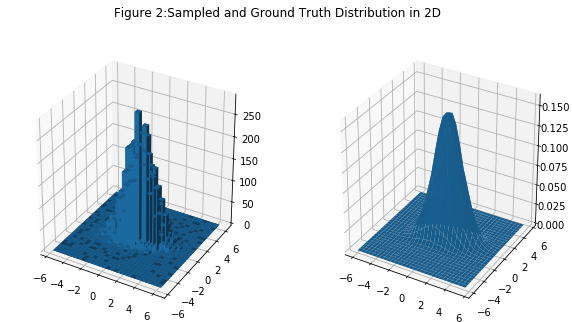

In [19]:
# Example code for Gaussian distribution visualization

import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

def multivariate_gaussian(mu, sigma, X):
    d = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    D = np.sqrt((2 * np.pi)**d * sigma_det)

    # This einsum call calculates (x-mu)T.sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', X-mu, sigma_inv, X-mu)

    return np.exp(-fac /2) / D


# Multivariate gaussian distribution
# Mean vector and covariance matrix
mu_v = np.array([0.5, -0.2])
sigma_v = np.array([[2,0.3], [0.3,0.5]])
bins = 30

# Random 2D gaussian distributed samples
Y_sampled=np.random.multivariate_normal(mu_v,sigma_v, 10000)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
z,x,y= np.histogram2d(Y_sampled[:,0], Y_sampled[:,1], bins= 30, range=[[-6,6], [-6,6]])


# Construct arrays for the anchor position
x_pos, y_pos = np.meshgrid(x[:-1] + 0.25, y[:-1] + 0.25, indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = 0

# Construct arrays with the dimensions
dx = dy = 0.5 * np.ones_like(z_pos)
dz = z.ravel()
ax.bar3d(x_pos, y_pos,z_pos,dx,dy,dz, zsort='average')


x = y= np.linspace(-6, 6, 30, endpoint=False)
X, Y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

Z = multivariate_gaussian(mu_v, sigma_v, pos)
print(Z.shape)



ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(X, Y, Z)

plt.suptitle('Figure 2:Sampled and Ground Truth Distribution in 2D')

plt.show()

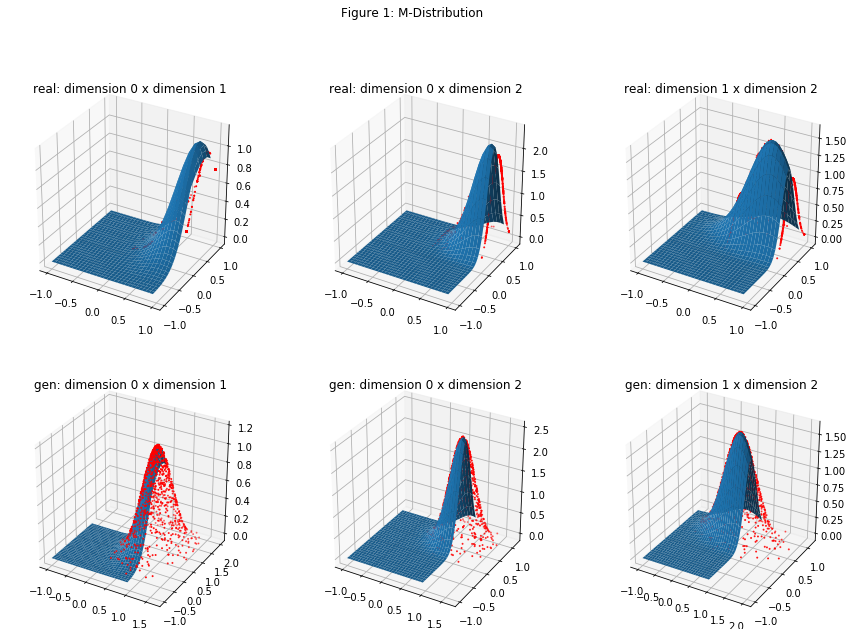

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

def multivariate_gaussian(mu, sigma, X):
    d = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    D = np.sqrt((2 * np.pi)**d * sigma_det)

    # This einsum call calculates (x-mu)T.sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', X-mu, sigma_inv, X-mu)

    return np.exp(-fac /2) / D




dimension_num=m_mean.shape[0]
subplot_num=dimension_num*(dimension_num-1)
row_num=2
col_num=subplot_num/2
    
fig = plt.figure(figsize=(col_num*5,row_num*5))
subplot_id=1
for way in ['real','gen']:
    if way=='real':
        mean,cov,array=m_mean,m_cov,m_array
    else:
        mean,cov,array=m_sample_mean,m_sample_cov,m_sample_array
    for i in range(dimension_num):
        for j in range(dimension_num):
            if i>=j:
                continue
            mu_v=np.array([mean[i],mean[j]])
            sigma_v=np.array([[cov[i,i],cov[i,j]],
                             [cov[j,i],cov[j,j]]])

            x = y= np.linspace(-1, 1, 30, endpoint=False)
            X, Y = np.meshgrid(x, y)

            # Pack X and Y into a single 3-dimensional array
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y

            Z = multivariate_gaussian(mu_v, sigma_v, pos)

            xs=array[:,i]
            ys=array[:,j]
            pos=np.empty((array.shape[0],2))
            pos[:,0]=xs
            pos[:,1]=ys
            zs=multivariate_normal.pdf(pos, mean=mu_v, cov=sigma_v)


            ax = fig.add_subplot(row_num,col_num,subplot_id, projection='3d')
            ax.plot_surface(X, Y, Z)
            ax.scatter(xs,ys,zs,c='r',marker='o',s=1)

            ax.set_title('{}: dimension {} x dimension {}'.format(way,i,j))
            subplot_id+=1

plt.suptitle('Figure 1: M-Distribution')

plt.savefig("m-distribution.pdf",bbox_inches = 'tight')

plt.show()

# fig.savefig('m-distribution.eps',dpi=600,format='eps')

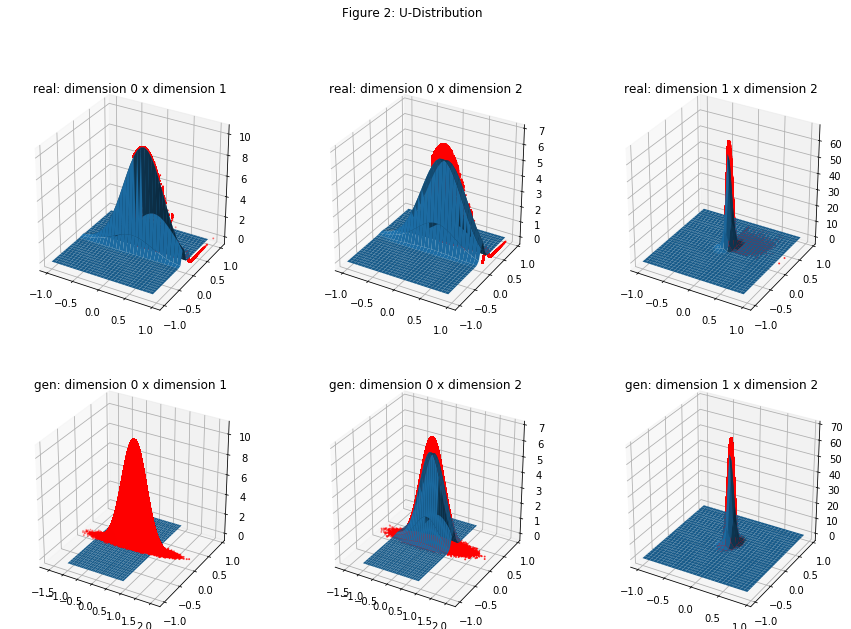

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

def multivariate_gaussian(mu, sigma, X):
    d = mu.shape[0]
    sigma_det = np.linalg.det(sigma)
    sigma_inv = np.linalg.inv(sigma)
    D = np.sqrt((2 * np.pi)**d * sigma_det)

    # This einsum call calculates (x-mu)T.sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', X-mu, sigma_inv, X-mu)

    return np.exp(-fac /2) / D




dimension_num=u_mean.shape[0]
subplot_num=dimension_num*(dimension_num-1)
row_num=2
col_num=subplot_num/2
    
fig = plt.figure(figsize=(col_num*5,row_num*5))
subplot_id=1
for way in ['real','gen']:
    if way=='real':
        mean,cov,array=u_mean,u_cov,u_array
    else:
        mean,cov,array=u_sample_mean,u_sample_cov,u_sample_array
    for i in range(dimension_num):
        for j in range(dimension_num):
            if i>=j:
                continue
            mu_v=np.array([mean[i],mean[j]])
            sigma_v=np.array([[cov[i,i],cov[i,j]],
                             [cov[j,i],cov[j,j]]])

            x = y= np.linspace(-1, 1, 30, endpoint=False)
            X, Y = np.meshgrid(x, y)

            # Pack X and Y into a single 3-dimensional array
            pos = np.empty(X.shape + (2,))
            pos[:, :, 0] = X
            pos[:, :, 1] = Y

            Z = multivariate_gaussian(mu_v, sigma_v, pos)

            xs=array[:,i]
            ys=array[:,j]
            pos=np.empty((array.shape[0],2))
            pos[:,0]=xs
            pos[:,1]=ys
            zs=multivariate_normal.pdf(pos, mean=mu_v, cov=sigma_v)


            ax = fig.add_subplot(row_num,col_num,subplot_id, projection='3d')
            ax.plot_surface(X, Y, Z)
            ax.scatter(xs,ys,zs,c='r',marker='o',s=1)

            ax.set_title('{}: dimension {} x dimension {}'.format(way,i,j))
            subplot_id+=1

plt.suptitle('Figure 2: U-Distribution')

# plt.savefig("u-distribution.pdf",bbox_inches = 'tight')

plt.show()

# fig.savefig('u-distribution.eps',dpi=600,format='eps')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


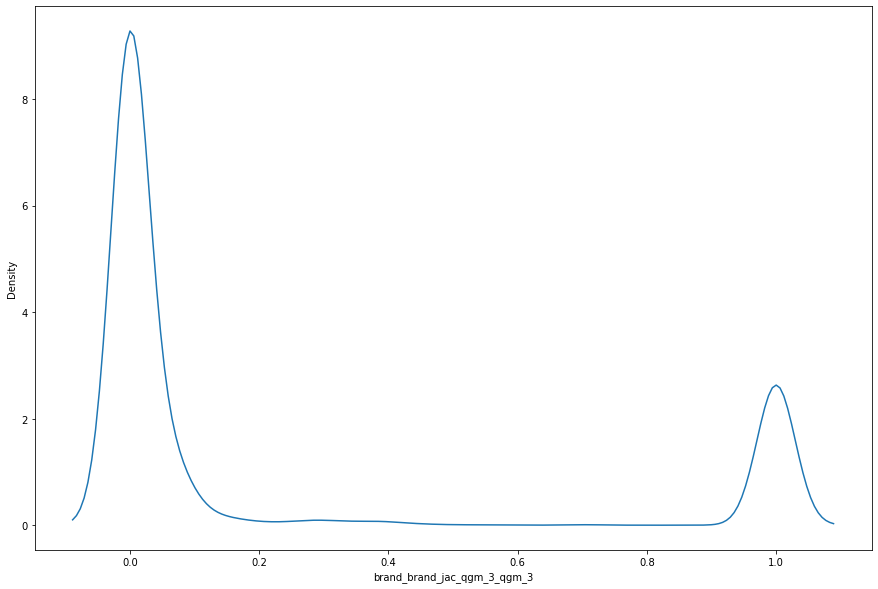

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3*5,2*5))
ax=sns.kdeplot(data=u_data,x="brand_brand_jac_qgm_3_qgm_3")
fig.add_subplot(ax)
plt.savefig("figs/u_brand_dis.pdf",bbox_inches = 'tight')
plt.show()

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


ValueError: The Subplot must have been created in the present figure

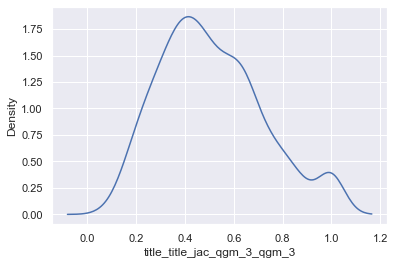

In [15]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3*5,2*5))
%matplotlib inline
ax=sns.kdeplot(data=m_data,x="title_title_jac_qgm_3_qgm_3")
fig.add_subplot(ax)
plt.savefig("figs/wuyuzi.pdf",bbox_inches = 'tight')
plt.show()

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


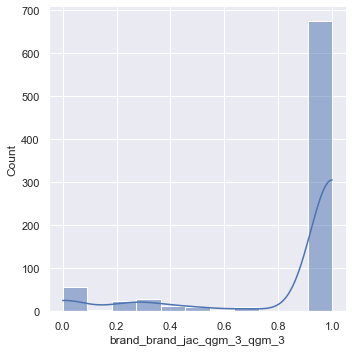

In [16]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3*5,2*5))
%matplotlib inline
g=sns.displot(data=m_data,x="brand_brand_jac_qgm_3_qgm_3",kde=True)
# print(type(ax))
# fig.add_subplot(ax)
# plt.savefig("figs/wuyuzi.pdf",bbox_inches = 'tight')
# plt.show()
g.savefig('figs/m_brand_dis.pdf')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


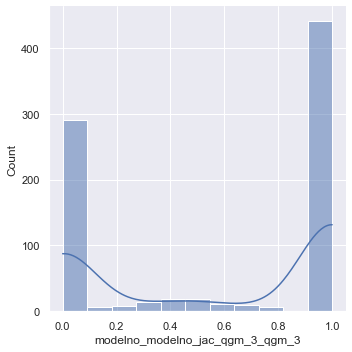

In [37]:
g=sns.displot(data=m_data,x="modelno_modelno_jac_qgm_3_qgm_3",kde=True)
g.savefig('figs/m_modelno_dis.pdf')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


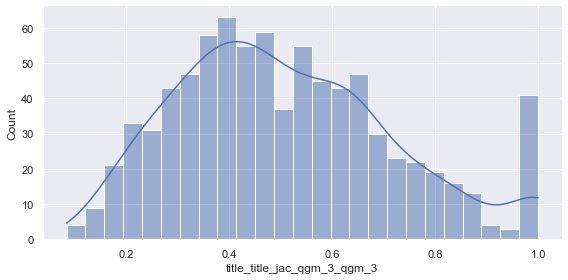

In [28]:
g=sns.displot(data=m_data,x="title_title_jac_qgm_3_qgm_3",kde=True,bins=25,height=4,aspect=2)
g.savefig('figs/m_title_dis.pdf')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


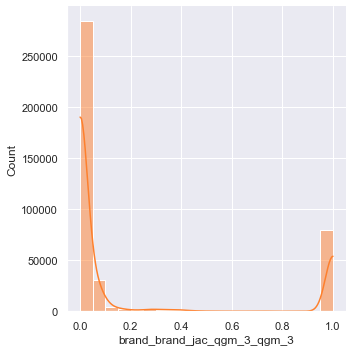

In [44]:
g=sns.displot(data=u_data,x="brand_brand_jac_qgm_3_qgm_3",kde=True,color='#FE802D',bins=20)
g.savefig('figs/u_brand_dis.pdf')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


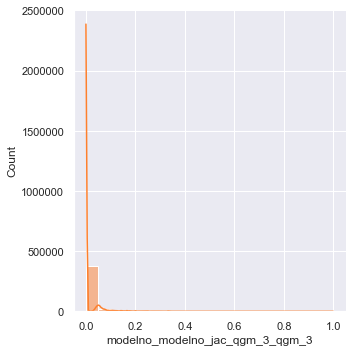

In [52]:
g=sns.displot(data=u_data,x="modelno_modelno_jac_qgm_3_qgm_3",kde=True,color='#FE802D',bins=20)
g.savefig('figs/u_modelno_dis.pdf')

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


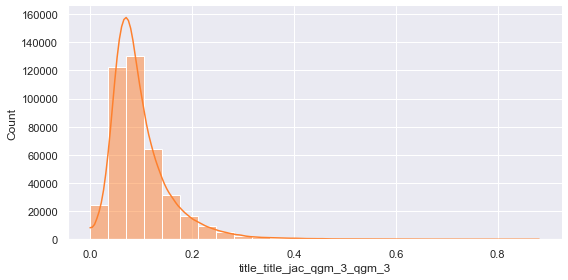

In [29]:
g=sns.displot(data=u_data,x="title_title_jac_qgm_3_qgm_3",kde=True,color='#FE802D',bins=25,height=4,aspect=2)
g.savefig('figs/u_title_dis.pdf')

In [36]:
m_data[m_data['modelno_modelno_jac_qgm_3_qgm_3']==0]

,_id,idWalmart,idAmazon,brand_brand_jac_qgm_3_qgm_3,modelno_modelno_jac_qgm_3_qgm_3,title_title_jac_qgm_3_qgm_3,gold
926,926,6,10423,1.0,0.0,0.297872,1
6567,6567,16,17365,1.0,0.0,0.802469,1
6689,6689,16,17811,1.0,0.0,0.642105,1
11407,11407,20,17430,1.0,0.0,0.493671,1
11585,11585,21,16838,1.0,0.0,0.378947,1
...,...,...,...,...,...,...,...
1278089,1278089,2483,19120,1.0,0.0,0.186667,1
1288136,1288136,2509,11583,1.0,0.0,0.512195,1
1304828,1304828,2540,10706,1.0,0.0,0.358974,1
1306641,1306641,2543,6691,1.0,0.0,0.186275,1


/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


ValueError: The Subplot must have been created in the present figure

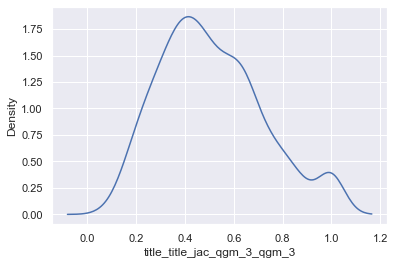

In [17]:
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(3*5,2*5))
%matplotlib inline
ax=sns.kdeplot(data=m_data,x="title_title_jac_qgm_3_qgm_3")
fig.add_subplot(ax)
plt.savefig("figs/wuyuzi.pdf",bbox_inches = 'tight')
plt.show()

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


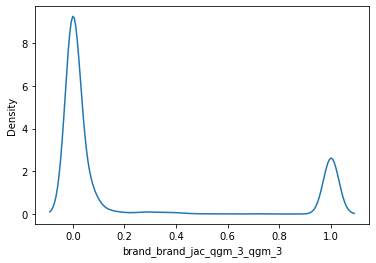

In [31]:
sns.kdeplot(data=u_data,x="brand_brand_jac_qgm_3_qgm_3")

/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/xuedi/anaconda3/envs/deepbrowse/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


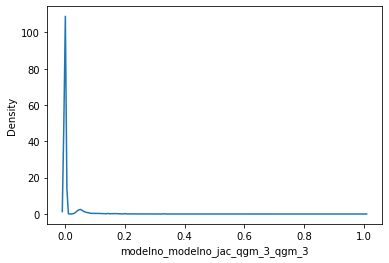

In [32]:
sns.kdeplot(data=u_data,x="modelno_modelno_jac_qgm_3_qgm_3")

In [1]:
sns.kdeplot(data=u_data,x="title_title_jac_qgm_3_qgm_3")

NameError: name 'sns' is not defined

In [31]:
m_data

,_id,idWalmart,idAmazon,brand_brand_jac_qgm_3_qgm_3,modelno_modelno_jac_qgm_3_qgm_3,title_title_jac_qgm_3_qgm_3,gold
0,556,4,4379,1.000000,1.000000,0.337209,1
1,926,6,10423,1.000000,0.000000,0.297872,1
2,995,6,20933,0.285714,1.000000,0.574468,1
3,2531,10,2457,1.000000,1.000000,0.196078,1
4,5551,16,4283,1.000000,1.000000,0.678161,1
...,...,...,...,...,...,...,...
816,1304866,2541,5176,1.000000,1.000000,0.723077,1
817,1306641,2543,6691,1.000000,0.000000,0.186275,1
818,1306837,2544,2534,0.705882,1.000000,0.385542,1
819,1309933,2550,19120,1.000000,0.000000,0.328125,1


In [112]:
from sklearn.mixture import GaussianMixture
m_gm=GaussianMixture(n_components=10, random_state=0).fit(m_array)
print('m_gm.weights_:')
print(m_gm.weights_,'\n')
print('m_gm.means:')
print(m_gm.means_,'\n')
print('m_gm.covariances:')
print(m_gm.covariances_)

m_gm.weights_:
[0.22124306 0.24332087 0.0826969  0.24440498 0.0267108  0.02382626
 0.07068803 0.05980351 0.0235074  0.00379819] 

m_gm.means:
[[1.00000000e+000 1.00000000e+000 3.26236323e-001]
 [1.00000000e+000 9.88131292e-324 5.14742611e-001]
 [1.39627871e-001 2.56023082e-002 5.15407386e-001]
 [1.00000000e+000 1.00000000e+000 6.26168111e-001]
 [1.42292634e-002 1.00000000e+000 5.22584781e-001]
 [1.00000000e+000 2.03767181e-003 1.00000000e+000]
 [1.00000000e+000 4.72999548e-001 3.98440312e-001]
 [4.07957053e-001 9.59672347e-001 4.88969085e-001]
 [1.00000000e+000 3.63954316e-001 7.20070553e-001]
 [1.00000000e+000 5.50354224e-002 4.16516570e-001]] 

m_gm.covariances:
[[[ 1.00000000e-006  0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  1.00000000e-006  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000  1.16246767e-002]]

 [[ 1.00000000e-006  0.00000000e+000  1.78001050e-032]
  [ 0.00000000e+000  1.00000000e-006  4.94065646e-324]
  [ 1.84969636e-032  4.94065646e-324  3.35838512e-

In [113]:
print(m_gm.score(m_array))
score=m_gm.score_samples(m_array)
sort_score_id=np.argsort(score)
for id in sort_score_id[:10]:
    print(id,m_array[id],score[id])

8.631586238986856
229 [0.23809524 0.5        0.37623762] -8.108815668457204
120 [0.         0.33333333 0.21686747] -7.0494690123159165
155 [0.         0.33333333 0.38271605] -7.049363646016322
284 [0.         0.58333333 0.7037037 ] -6.815970447538265
59 [0.2        0.33333333 0.28318584] -6.546363119329128
82 [0.25       0.31578947 0.15294118] -6.0025024570265195
275 [0.5        0.61538462 0.6969697 ] -5.847934791866643
592 [0.66666667 1.         1.        ] -5.356669132092575
751 [0.64285714 0.72727273 0.25581395] -4.524624870868715
50 [0.70588235 0.06666667 0.34666667] -4.359770420976977


In [114]:
from sklearn.mixture import GaussianMixture
u_gm=GaussianMixture(n_components=20, random_state=0).fit(u_array)
print('u_gm.weights_:')
print(u_gm.weights_,'\n')
print('u_gm.means:')
print(u_gm.means_,'\n')
print('u_gm.covariances:')
print(u_gm.covariances_)

u_gm.weights_:
[0.14236191 0.0372594  0.01413938 0.0646642  0.00232436 0.01446425
 0.00303562 0.16526989 0.00302231 0.03237785 0.00403896 0.03020539
 0.00374183 0.10565994 0.2869725  0.00739645 0.02172257 0.04526333
 0.00295226 0.01312759] 

u_gm.means:
[[1.07831693e-71 3.91703682e-71 1.30763024e-01]
 [1.00000000e+00 8.37891368e-76 1.96176855e-01]
 [1.00000000e+00 5.26347233e-02 6.96194216e-02]
 [6.12521061e-02 1.74876608e-74 8.11332521e-02]
 [1.00000000e+00 9.87786438e-02 3.03074633e-01]
 [1.00000000e+00 8.78243554e-02 1.04906681e-01]
 [6.41263469e-02 5.33177818e-02 1.55034927e-01]
 [3.18137006e-72 1.81673735e-70 5.23345251e-02]
 [2.29479284e-01 1.92086414e-01 2.20863855e-01]
 [2.29070965e-01 7.35620563e-74 1.01833826e-01]
 [1.00000000e+00 5.52305142e-02 1.93231162e-01]
 [1.57173584e-72 2.54551163e-71 2.18275834e-01]
 [1.00000000e+00 3.51427682e-01 3.34405332e-01]
 [1.00000000e+00 5.36857675e-75 7.76382690e-02]
 [3.29580505e-71 3.12791334e-71 8.13127475e-02]
 [4.51864617e-02 9.4037187

In [144]:
print(u_gm.score(u_array))
score=u_gm.score_samples(u_array)
sort_score_id=np.argsort(score)
for id in sort_score_id[:10]:
    print(id,u_array[id],score[id])
delta_u_array=u_array[sort_score_id[:1000]]
# print(delta_u_array)

11.396121416113447
14239 [0.         0.         0.86666667] -16.07881640896811
329845 [0.44444444 0.66666667 0.57894737] -14.56709130436176
365112 [0.33333333 0.66666667 0.61728395] -14.473618738637011
141801 [0.70588235 0.625      0.32352941] -13.306923563925324
333631 [0.44444444 0.72222222 0.28571429] -12.97725423135833
143348 [0.15       0.7        0.47572816] -12.178256245128583
189738 [0.45       0.19047619 0.77777778] -11.808230551811981
226421 [0.44444444 0.66666667 0.31034483] -11.316194721214991
387220 [0.15       0.66666667 0.46666667] -11.09656380962479
309305 [0.         0.         0.68965517] -10.8293590491675


In [127]:
m_gm_sample_array, m_gm_sample_com=m_gm.sample(m_array.shape[0])
u_gm_sample_array, u_gm_sample_com=u_gm.sample(u_array.shape[0])

In [128]:
print(u_gm.score(u_gm_sample_array))
score=u_gm.score_samples(u_gm_sample_array)
sort_score_id=np.argsort(score)
for id in sort_score_id[:10]:
    print(id,u_gm_sample_array[id],score[id])

10.514721805602496
174519 [ 0.05545182  0.15139682 -0.35380483] -12.235620262605323
174043 [ 0.57076066  0.10408152 -0.29957451] -11.54021078544282
174557 [ 0.12144577 -0.29211872  0.31165268] -10.735059746386703
174520 [0.98682481 0.13611898 0.36528243] -10.220295053313869
174896 [-0.17629235 -0.04064606 -0.0875823 ] -9.922309388320237
174246 [0.82700069 0.399477   0.26185873] -9.638909441654697
175038 [0.26429261 0.31643693 0.70133871] -9.63043704163156
174028 [-0.51307339  0.37391036  0.27439071] -9.58711600820444
174405 [ 0.1185317   0.55723651 -0.09932118] -9.44557070572976
174280 [0.70648188 0.46407191 0.27371183] -9.074699943945184


In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x=np.concatenate((m_gm_sample_array,u_gm_sample_array),axis=0)
y=np.array([1]*len(m_gm_sample_array)+[0]*len(u_gm_sample_array))
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x,y)
pred_label=clf.predict(test_array)
print('Accuracy', accuracy_score(test_label, pred_label))
print('Precision', precision_score(test_label, pred_label))
print('Recall', recall_score(test_label, pred_label))
print('f1_score', f1_score(test_label, pred_label))
confusion_matrix(test_label, pred_label)

Accuracy 0.9994537893049406
Precision 0.717948717948718
Recall 0.6847826086956522
f1_score 0.7009735744089013


array([[393154,     99],
       [   116,    252]])

In [145]:
m_clip_gm_sample_array=np.clip(m_gm_sample_array,0,1)
u_clip_gm_sample_array=np.clip(u_gm_sample_array,0,1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x=np.concatenate((m_clip_gm_sample_array,u_clip_gm_sample_array,delta_u_array),axis=0)
y=np.array([1]*len(m_clip_gm_sample_array)+[0]*len(u_clip_gm_sample_array)+[0]*len(delta_u_array))
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x,y)
pred_label=clf.predict(test_array)
print('Accuracy', accuracy_score(test_label, pred_label))
print('Precision', precision_score(test_label, pred_label))
print('Recall', recall_score(test_label, pred_label))
print('f1_score', f1_score(test_label, pred_label))
confusion_matrix(test_label, pred_label)

Accuracy 0.9995731935033954
Precision 0.9032258064516129
Recall 0.6086956521739131
f1_score 0.7272727272727272


array([[393229,     24],
       [   144,    224]])

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
x=np.concatenate((m_gm_sample_array,u_gm_sample_array,delta_u_array),axis=0)
y=np.array([1]*len(m_gm_sample_array)+[0]*len(u_gm_sample_array)+[0]*len(delta_u_array))
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(x,y)
pred_label=clf.predict(test_array)
print('Accuracy', accuracy_score(test_label, pred_label))
print('Precision', precision_score(test_label, pred_label))
print('Recall', recall_score(test_label, pred_label))
print('f1_score', f1_score(test_label, pred_label))
confusion_matrix(test_label, pred_label)

Accuracy 0.9994918970278517
Precision 0.823076923076923
Recall 0.5815217391304348
f1_score 0.6815286624203821


array([[393207,     46],
       [   154,    214]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

[[ 0.50150623 -0.03606668]
 [ 0.40643935 -0.08753757]
 [ 0.55612174 -0.01035478]
 ...
 [-0.82498491  0.15317339]
 [-0.74845467  0.53412927]
 [-0.69584648  0.15310194]]


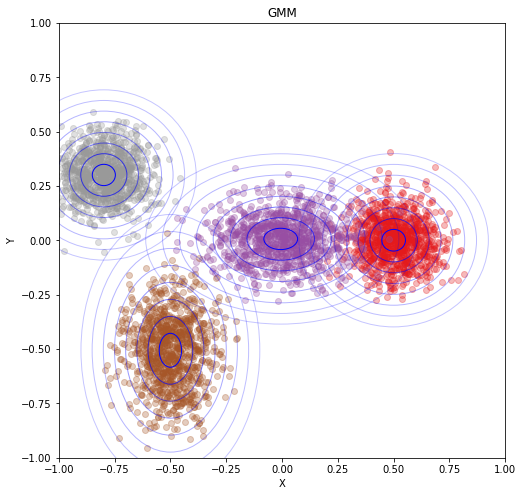

In [28]:
## Generate synthetic data
N,D = 1000, 2 # number of points and dimenstinality

if D == 2:
    #set gaussian ceters and covariances in 2D
    means = np.array([[0.5, 0.0],
                      [0, 0],
                      [-0.5, -0.5],
                      [-0.8, 0.3]])
    covs = np.array([np.diag([0.01, 0.01]),
                     np.diag([0.025, 0.01]),
                     np.diag([0.01, 0.025]),
                     np.diag([0.01, 0.01])])
elif D == 3:
    # set gaussian ceters and covariances in 3D
    means = np.array([[0.5, 0.0, 0.0],
                      [0.0, 0.0, 0.0],
                      [-0.5, -0.5, -0.5],
                      [-0.8, 0.3, 0.4]])
    covs = np.array([np.diag([0.01, 0.01, 0.03]),
                     np.diag([0.08, 0.01, 0.01]),
                     np.diag([0.01, 0.05, 0.01]),
                     np.diag([0.03, 0.07, 0.01])])
n_gaussians = means.shape[0]

points = []
for i in range(len(means)):
    x = np.random.multivariate_normal(means[i], covs[i], N )
    points.append(x)
points = np.concatenate(points)
print(points)

from sklearn.mixture import GaussianMixture
import visualization
#fit the gaussian model
gmm = GaussianMixture(n_components=n_gaussians, covariance_type='diag')
gmm.fit(points)

#visualize
if D == 2:
    visualization.visualize_2D_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)
elif D == 3:
    visualization.visualize_3d_gmm(points, gmm.weights_, gmm.means_.T, np.sqrt(gmm.covariances_).T)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0.43287803 0.17783372 0.38928824]
[[1.         0.63684254]
 [0.23581797 0.53270703]
 [1.         0.35601944]]
[[1.00000000e-06 3.37609179e-02]
 [4.78665083e-02 4.98066048e-02]
 [1.00000000e-06 1.27979157e-02]]


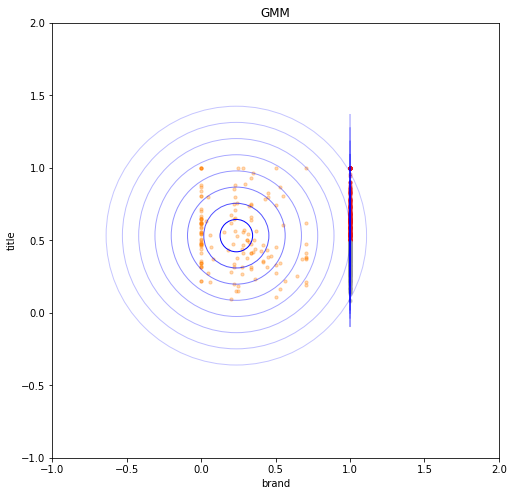

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cmx
import os
from sklearn.mixture import GaussianMixture

def my_visualize_2D_gmm(points, com_ids, w, mu, stdev, export=True):
    '''
    plots points and their corresponding gmm model in 2D
    Input: 
        points: N X 2, sampled points
        w: n_gaussians, gmm weights
        mu: 2 X n_gaussians, gmm means
        stdev: 2 X n_gaussians, gmm standard deviation (assuming diagonal covariance matrix)
    Output:
        None
    '''
    n_gaussians = mu.shape[1]
    N = int(np.round(points.shape[0] / n_gaussians))
    # Visualize data
    fig = plt.figure(figsize=(8, 8))
    axes = plt.gca()
    axes.set_xlim([-1, 2])
    axes.set_ylim([-1, 2])
    plt.set_cmap('Set1')
    colors = cmx.Set1(np.linspace(0, 1, n_gaussians))
    for i in range(n_gaussians):
        idx = com_ids[i]
        plt.scatter(points[idx, 0], points[idx, 1], alpha=0.3, c=colors[i], s=10)
        for j in range(8):
            axes.add_patch(
                patches.Ellipse(mu[:, i], width=(j+1) * stdev[0, i], height=(j+1) *  stdev[1, i], fill=False, color=[0.0, 0.0, 1.0, 1.0/(0.5*j+1)]))
        plt.title('GMM')
    plt.xlabel('brand')
    plt.ylabel('title')

    if export:
        if not os.path.exists('images/'): os.mkdir('images/')
        plt.savefig('images/2D_GMM_demonstration.pdf', dpi=600, format='pdf')

    plt.show()


n_gaussians=3
m_data=pd.read_csv('csv_files/product_m_data.csv')
u_data=pd.read_csv('csv_files/product_u_data.csv')
m_array=np.array(m_data[['brand_brand_jac_qgm_3_qgm_3','title_title_jac_qgm_3_qgm_3']])
m_gm=GaussianMixture(n_components=n_gaussians,covariance_type='diag').fit(m_array)


print(m_gm.weights_)
print(m_gm.means_)
print(m_gm.covariances_)

# N=2000
# points,points_from=m_gm.sample(N)
# points=np.clip(points,0,1)

N=m_array.shape[0]
points=m_array
resp=m_gm.predict_proba(points)
points_from=resp.argmax(-1)

com_ids={}
for i in range(n_gaussians):
    com_ids[i]=[]
for i in range(N):
    com_ids[points_from[i]].append(i)
# print(com_ids)



#visualize
visualization.my_visualize_2D_gmm(points, com_ids, m_gm.weights_, m_gm.means_.T, np.sqrt(m_gm.covariances_).T)

In [16]:
m_array

array([[1.        , 0.3372093 ],
       [1.        , 0.29787234],
       [0.28571429, 0.57446809],
       ...,
       [0.70588235, 0.38554217],
       [1.        , 0.328125  ],
       [1.        , 0.26804124]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


[0.6694994  0.14803657 0.04029047 0.04724723 0.09492633]
[[5.46696709e-71 9.13491783e-02]
 [1.00000000e+00 8.33792175e-02]
 [2.21322530e-01 1.26811527e-01]
 [1.00000000e+00 2.21884456e-01]
 [6.16200784e-02 9.88376380e-02]]
[[1.00000000e-06 2.12743971e-03]
 [9.99999982e-07 1.91350119e-03]
 [2.11188585e-02 1.08250015e-02]
 [1.00000000e-06 1.18568998e-02]
 [2.74901587e-04 1.98420455e-03]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


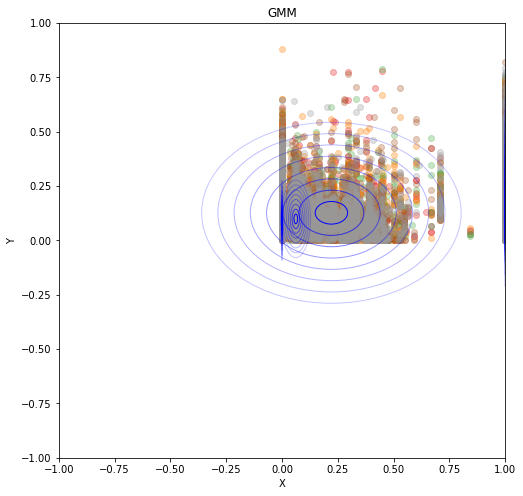

In [14]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import visualization

u_data=pd.read_csv('csv_files/product_u_data.csv')
u_array=np.array(u_data[['brand_brand_jac_qgm_3_qgm_3','title_title_jac_qgm_3_qgm_3']])
u_gm=GaussianMixture(n_components=5,covariance_type='diag').fit(u_array)


print(u_gm.weights_)
print(u_gm.means_)
print(u_gm.covariances_)

#visualize
visualization.visualize_2D_gmm(u_array, u_gm.weights_, u_gm.means_.T, np.sqrt(u_gm.covariances_).T)

[0.48276816 0.17783372 0.33939812]
[[1.         0.61586768]
 [0.23581796 0.53270703]
 [1.         0.34457476]]
[[1.00000000e-06 3.56694588e-02]
 [4.78664994e-02 4.98066083e-02]
 [1.00000000e-06 1.14093867e-02]]
[[0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 ...
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]
 [0.   0.02 0.04 ... 0.94 0.96 0.98]]
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.04 0.04 0.04 ... 0.04 0.04 0.04]
 ...
 [0.94 0.94 0.94 ... 0.94 0.94 0.94]
 [0.96 0.96 0.96 ... 0.96 0.96 0.96]
 [0.98 0.98 0.98 ... 0.98 0.98 0.98]]
[[2.54577255e-02 2.77438977e-02 2.99837629e-02 ... 1.72977207e-04
  1.27281028e-04 7.80367405e+00]
 [3.11521368e-02 3.39496825e-02 3.66905632e-02 ... 2.11668934e-04
  1.55751385e-04 1.25722160e+01]
 [3.78153599e-02 4.12112809e-02 4.45384167e-02 ... 2.56943431e-04
  1.89065512e-04 1.98916283e+01]
 ...
 [5.69987307e-02 6.21173700e-02

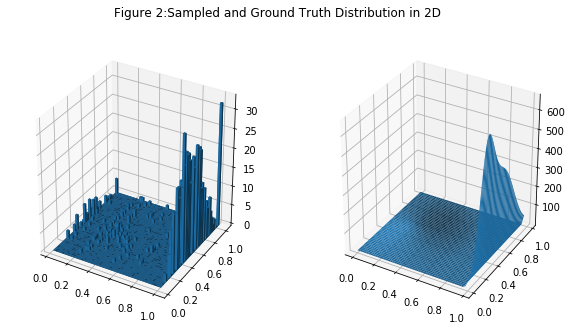

In [47]:
##### Example code for Gaussian distribution visualization

import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D


# Multivariate gaussian distribution
# Mean vector and covariance matrix
mu_v = np.array([0.5, -0.2])
sigma_v = np.array([[2,0.3], [0.3,0.5]])
bins = 30

# Random 2D gaussian distributed samples
# Y_sampled=np.random.multivariate_normal(mu_v,sigma_v, 10000)
Y_sampled=m_array

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
z,x,y= np.histogram2d(Y_sampled[:,0], Y_sampled[:,1], bins= 50, range=[[0,1], [0,1]])

# Construct arrays for the anchor position
x_pos, y_pos = np.meshgrid(x[:-1] + 0.02, y[:-1] + 0.02, indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = 0


# Construct arrays with the dimensions
dx = dy = 0.02 * np.ones_like(z_pos)
dz = z.ravel()
ax.bar3d(x_pos, y_pos,z_pos,dx,dy,dz, zsort='average')


x = y= np.linspace(0, 1, 50, endpoint=False)
X, Y = np.meshgrid(x, y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Z = multivariate_gaussian(mu_v, sigma_v, pos)
n_gaussians=3
m_data=pd.read_csv('csv_files/product_m_data.csv')
m_array=np.array(m_data[['brand_brand_jac_qgm_3_qgm_3','title_title_jac_qgm_3_qgm_3']])
m_gm=GaussianMixture(n_components=n_gaussians,covariance_type='diag').fit(m_array)
Z=np.empty((pos.shape[0],pos.shape[1]))
for i in range(pos.shape[0]):
    for j in range(pos.shape[1]):
        Z[i][j]=np.exp(m_gm.score_samples([pos[i,j]+0.02]))[0]
print(m_gm.weights_)
print(m_gm.means_)
print(m_gm.covariances_)

print(X)
print(Y)
print(Z)
ax1 = fig.add_subplot(122, projection='3d')
ax1.plot_surface(X, Y, Z)



plt.suptitle('Figure 2:Sampled and Ground Truth Distribution in 2D')

plt.show()

In [46]:
np.exp(m_gm.score_samples([[0.98,0.98]]))

array([0.00023908])

[[ 4146. 34332. 80335. ...     0.     0.     0.]
 [  156.   997.  2518. ...     0.     0.     0.]
 [  269.  1968.  4914. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...     0.     0.     0.]
 [    0.     0.     0. ...     0.     0.     0.]
 [ 5313.  9679. 14386. ...     0.     0.     0.]]
[0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25  0.275
 0.3   0.325 0.35  0.375 0.4   0.425 0.45  0.475 0.5   0.525 0.55  0.575
 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775 0.8   0.825 0.85  0.875
 0.9   0.925 0.95  0.975 1.   ]
[0.025 0.025 0.025 ... 1.    1.    1.   ]
[0.025 0.05  0.075 ... 0.95  0.975 1.   ]
0
0.025


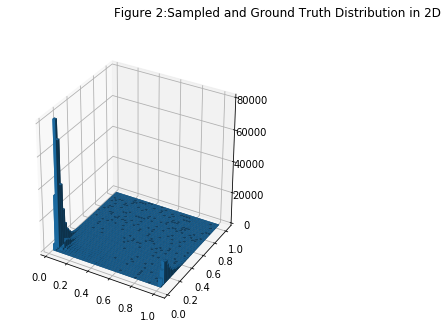

In [18]:
# Example code for Gaussian distribution visualization

import numpy as np
import matplotlib.pyplot as plt
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D


# Multivariate gaussian distribution
# Mean vector and covariance matrix
mu_v = np.array([0.5, -0.2])
sigma_v = np.array([[2,0.3], [0.3,0.5]])
bins = 30

# Random 2D gaussian distributed samples
# Y_sampled=np.random.multivariate_normal(mu_v,sigma_v, 10000)
u_data=pd.read_csv('csv_files/product_u_data.csv')
u_array=np.array(u_data[['brand_brand_jac_qgm_3_qgm_3','title_title_jac_qgm_3_qgm_3']])
Y_sampled=u_array

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
z,x,y= np.histogram2d(Y_sampled[:,0], Y_sampled[:,1], bins= 40, range=[[0,1], [0,1]])
print(z)
print(x)

# Construct arrays for the anchor position
x_pos, y_pos = np.meshgrid(x[:-1] + 0.025, y[:-1] + 0.025, indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = 0
print(x_pos)
print(y_pos)
print(z_pos)

# Construct arrays with the dimensions
dx = dy = 0.025 * np.ones_like(z_pos)
dz = z.ravel()
ax.bar3d(x_pos, y_pos,z_pos,dx,dy,dz, zsort='average')
print(dx)



plt.suptitle('Figure 2:Sampled and Ground Truth Distribution in 2D')

plt.show()